In [2]:

import pandas as pd
data=pd.read_csv('XSS_dataset.csv', on_bad_lines='skip')
data.head()
data.shape

(13686, 3)

In [ ]:
data.head()


,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


<Axes: xlabel='Label', ylabel='count'>

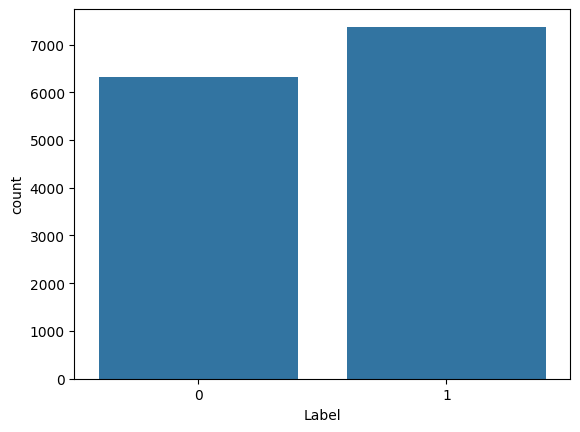

In [ ]:
import seaborn as sns
sns.countplot(x = 'Label',data = data)



# 0 fro bening and 1 for malicious

In [ ]:
data.shape

(13686, 3)

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Sentence,0
Label,0


In [ ]:
!pip install gensim
!pip install nltk

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [ ]:
data.columns

Index(['Unnamed: 0', 'Sentence', 'Label'], dtype='object')

In [4]:
X = data.drop(columns=['Unnamed: 0','Label'])
X

,Sentence
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i..."
1,"<tt onmouseover=""alert(1)"">test</tt>"
2,"\t </span> <span class=""reference-text"">Steeri..."
3,"\t </span> <span class=""reference-text""><cite ..."
4,"\t </span>. <a href=""/wiki/Digital_object_iden..."
...,...
13681,<img onpointerenter=alert(1)>XSS</img>
13682,"<source onbeforepaste=""alert(1)"" contenteditab..."
13683,"<div draggable=""true"" contenteditable>drag me<..."
13684,"<li><cite id=""CITEREFDomingos2015"" class=""cita..."


In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
corpus_text = '\n'.join(X[:13686]['Sentence'])
datas = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    datas.append(temp)



In [ ]:
model1 = gensim.models.Word2Vec(datas, min_count = 1,vector_size  = 100, window = 5, sg=0)

In [ ]:
model1

In [ ]:
import numpy as np # Import numpy

# ... (rest of the code remains the same)

# Create sentence vectors
sentence_vectors = []
for sentence in X['Sentence']:
    vector = []
    for word in word_tokenize(sentence.lower()):
        try:
            vector.append(model1.wv[word])  # Use model1 for vectorization
        except KeyError:
            # Handle words not in vocabulary
            vector.append([0] * 100)  # Assuming vector size is 100
    if vector:
        # Convert the vector to a NumPy array before applying sum
        sentence_vectors.append(np.mean(np.array(vector), axis=0).tolist())  # averaging word vectors for sentence
    else:
        sentence_vectors.append([0] * 100)


# Prepare data for training
X_data = sentence_vectors
y_data = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) #increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9941563184806428
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1260
           1       1.00      0.99      0.99      1478

    accuracy                           0.99      2738
   macro avg       0.99      0.99      0.99      2738
weighted avg       0.99      0.99      0.99      2738



Random Forest Accuracy: 0.9967129291453616
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1260
           1       1.00      0.99      1.00      1478

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



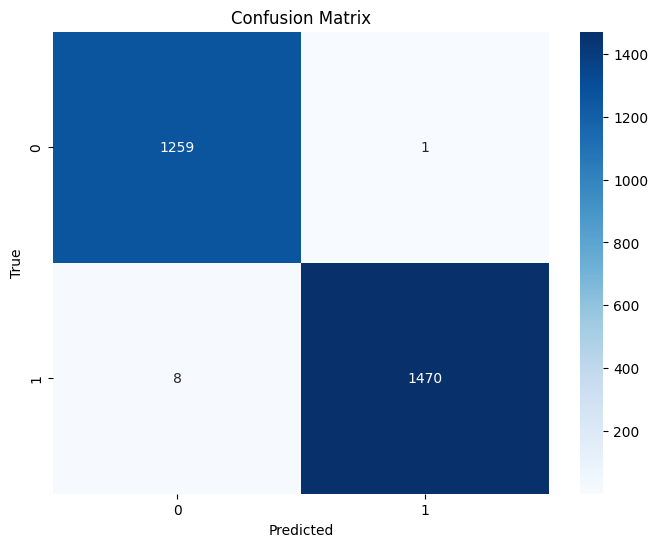

In [ ]:
# prompt: code to use model1 for training and testing of random forest model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code remains the same)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
cm=confusion_matrix(y_test,rf_y_pred)
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()









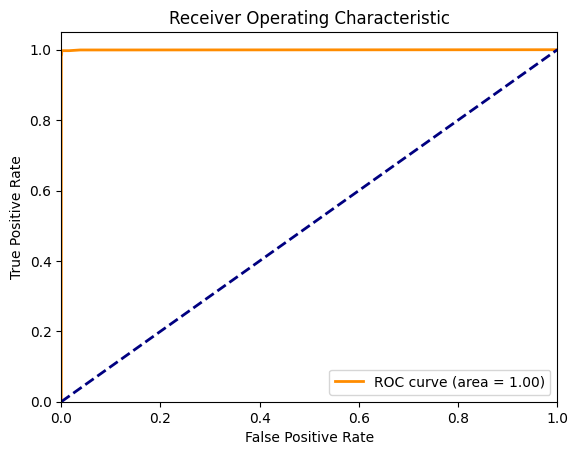

In [ ]:
# prompt: code to plot ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (your existing code)

# Get predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: code to test the random forest model with new malicious javascript code

import numpy as np
# Assuming rf_model is your trained RandomForestClassifier
# and model1 is your Word2Vec model

def predict_javascript(javascript_code, model, word2vec_model):
    """Predicts whether the given JavaScript code is malicious or benign.

    Args:
        javascript_code: The JavaScript code to analyze as a string.
        model: The trained RandomForestClassifier model.
        word2vec_model: The trained Word2Vec model.

    Returns:
        1 if malicious, 0 if benign.
    """
    vector = []
    for word in word_tokenize(javascript_code.lower()):
        try:
            vector.append(word2vec_model.wv[word])
        except KeyError:
            vector.append([0] * 100)  # Handle out-of-vocabulary words
    if vector:
        sentence_vector = np.mean(np.array(vector), axis=0).tolist()
    else:
        sentence_vector = [0] * 100

    prediction = model.predict([sentence_vector])
    return prediction[0]


# Example usage:
new_malicious_code = "<li><a href=\"/wiki/Mind%E2%80%93body_problem\" title=\"Mind–body problem\">Mind–body problem </a>"
new_benign_code = "console.log('Hello, world!');"


prediction_malicious = predict_javascript(new_malicious_code, rf_model, model1)
prediction_benign = predict_javascript(new_benign_code, rf_model, model1)

print(f"Prediction for malicious code: {prediction_malicious}")
print(f"Prediction for benign code: {prediction_benign}")


Prediction for malicious code: 0
Prediction for benign code: 0
